In [1]:
import sys
root_dir = '../../../'
sys.path.append(root_dir)

In [2]:
import pickle
from utils import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
n = 100

In [5]:
# base algorithm

with open('../../01_base/results-e-base-2.pickle', 'rb') as f:
    results = pickle.load(f)

# predicted = results['predicted']
# true = results['true']
predicted = results['predicted'][:, :n]
true = results['true'][:, :n]

In [6]:
# gradboost

with open('../03_run_algorithms/results-e-new-gradboost-1.pickle', 'rb') as f:
    predicted_gradboost = pickle.load(f)

# predicted_gradboost = predicted_gradboost
predicted_gradboost = predicted_gradboost[:, :n]

In [7]:
# knn

with open('../03_run_algorithms/results-e-new-knn-1.pickle', 'rb') as f:
    predicted_knn = pickle.load(f)

# predicted_knn = predicted_knn
predicted_knn = predicted_knn[:, :n]

In [8]:
# logreg

with open('../03_run_algorithms/results-e-new-logreg-1.pickle', 'rb') as f:
    predicted_logreg = pickle.load(f)

# predicted_logreg = predicted_logreg
predicted_logreg = predicted_logreg[:, :n]

In [9]:
# mlp

with open('../03_run_algorithms/results-e-new-mlp-1.pickle', 'rb') as f:
    predicted_mlp = pickle.load(f)

# predicted_mlp = predicted_mlp
predicted_mlp = predicted_mlp[:, :n]

In [10]:
# svc

with open('../03_run_algorithms/results-e-new-svc-1.pickle', 'rb') as f:
    predicted_svc = pickle.load(f)

# predicted_svc = predicted_svc
predicted_svc = predicted_svc[:, :n]

## Metrics

In [11]:
path = '/mnt/c/Users/Khetag/Desktop/DIPLOM/latex/images2/'

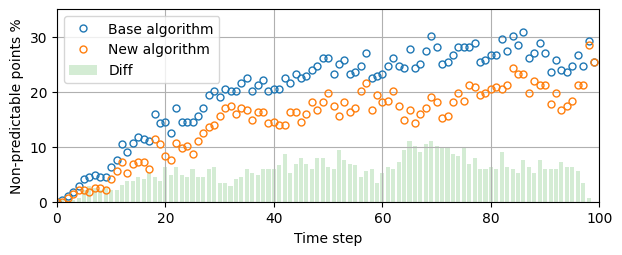

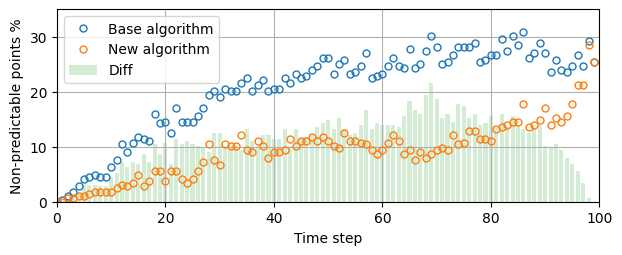

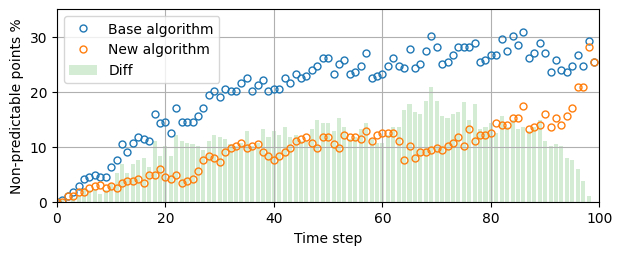

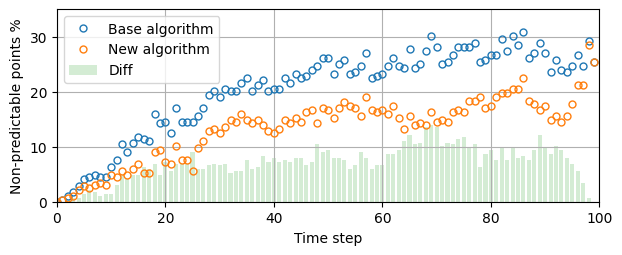

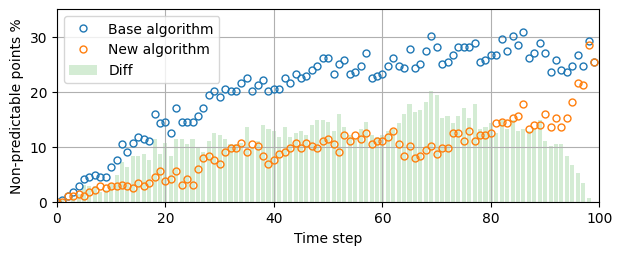

In [12]:
base = get_non_predictable_points_percent(predicted)
gradboost = get_non_predictable_points_percent(predicted_gradboost)
knn = get_non_predictable_points_percent(predicted_knn)
logreg = get_non_predictable_points_percent(predicted_logreg)
mlp = get_non_predictable_points_percent(predicted_mlp)
svc = get_non_predictable_points_percent(predicted_svc)

models = [
    ('#1. Pointwise motifs. Gradient boosting classifier.', gradboost, 'energy_pointwise_grad_nonpred.pdf'),
    ('#2. Pointwise motifs. KNN classifier.', knn, 'energy_pointwise_knn_nonpred.pdf'),
    ('#3. Pointwise motifs. Logistic regression classifier.', logreg, 'energy_pointwise_log_nonpred.pdf'),
    ('#4. Pointwise motifs. MLP classifier.', mlp, 'energy_pointwise_mlp_nonpred.pdf'),
    ('#5. Pointwise motifs. SVM classifier.', svc, 'energy_pointwise_svm_nonpred.pdf')
]

diff_labels = [
    'Pointwise Gradient boosting',
    'Pointwise KNN',
    'Pointwise Logistic regression',
    'Pointwise MLP',
    'Pointwise SVM'
]
diffs = []

for label, model, file_name in models:
    diffs.append(np.sum(base - model))
    plt.figure(figsize=[7, 2.5])
    plt.bar(range(n), base - model, color='#2ca02c', width=0.75, label='Diff', alpha=0.2)
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base algorithm')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New algorithm')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0, top=35)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('Non-predictable points %')
    plt.legend(loc='upper left')
    plt.grid()
    plt.savefig(path + file_name, bbox_inches='tight')
    plt.show()

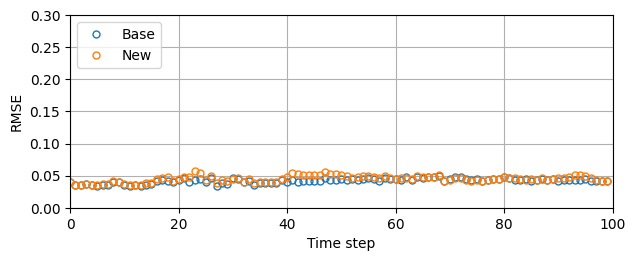

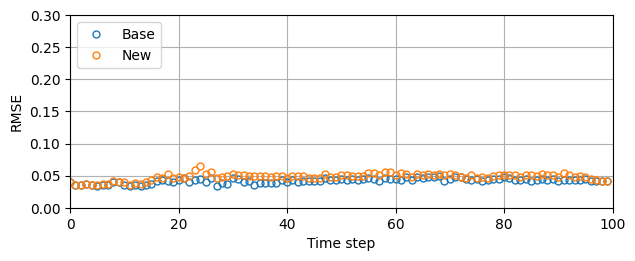

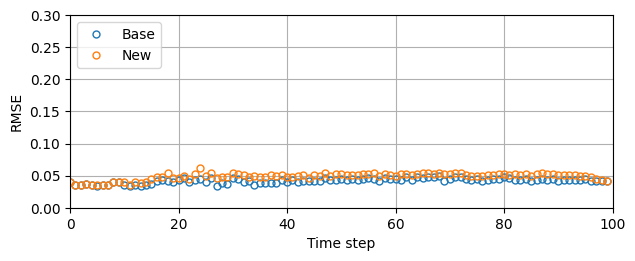

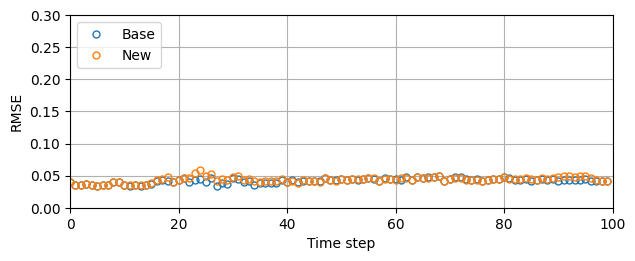

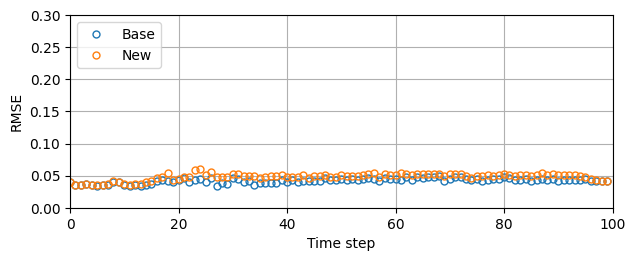

In [13]:
base = get_rmse(true, predicted)
gradboost = get_rmse(true, predicted_gradboost)
knn = get_rmse(true, predicted_knn)
logreg = get_rmse(true, predicted_logreg)
mlp = get_rmse(true, predicted_mlp)
svc = get_rmse(true, predicted_svc)

models = [
    ('#1. Pointwise motifs. Gradient boosting classifier.', gradboost, 'energy_pointwise_grad_rmse.pdf'),
    ('#2. Pointwise motifs. KNN classifier.', knn, 'energy_pointwise_knn_rmse.pdf'),
    ('#3. Pointwise motifs. Logistic regression classifier.', logreg, 'energy_pointwise_log_rmse.pdf'),
    ('#4. Pointwise motifs. MLP classifier.', mlp, 'energy_pointwise_mlp_rmse.pdf'),
    ('#5. Pointwise motifs. SVM classifier.', svc, 'energy_pointwise_svm_rmse.pdf')
]

for label, model, file_name in models:
    plt.figure(figsize=[7, 2.5])
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0, top=0.3)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left')
    plt.grid()
    plt.savefig(path + file_name, bbox_inches='tight')
    plt.show()

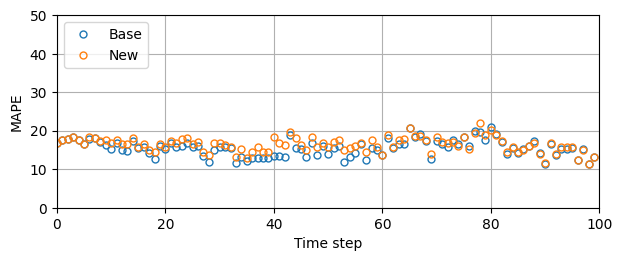

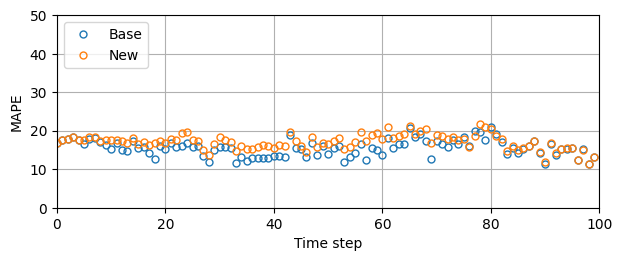

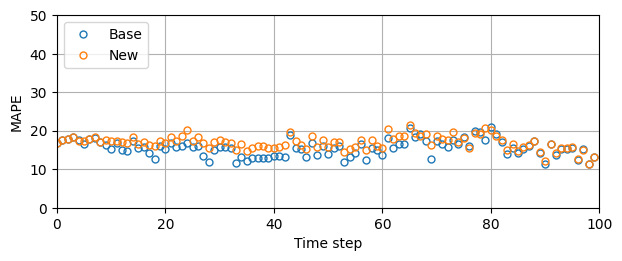

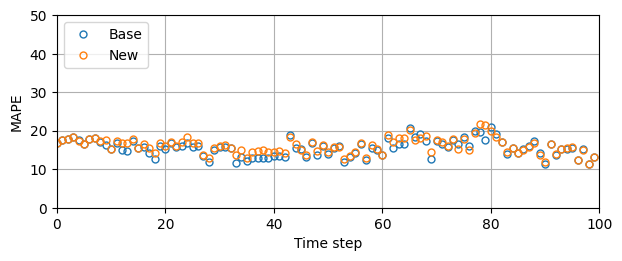

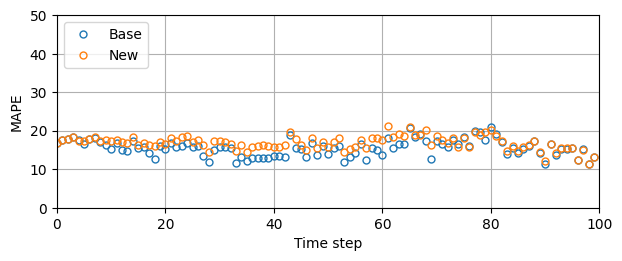

In [14]:
base = get_mape(true, predicted)
gradboost = get_mape(true, predicted_gradboost)
knn = get_mape(true, predicted_knn)
logreg = get_mape(true, predicted_logreg)
mlp = get_mape(true, predicted_mlp)
svc = get_mape(true, predicted_svc)

models = [
    ('#1. Pointwise motifs. Gradient boosting classifier.', gradboost, 'energy_pointwise_grad_mape.pdf'),
    ('#2. Pointwise motifs. KNN classifier.', knn, 'energy_pointwise_knn_mape.pdf'),
    ('#3. Pointwise motifs. Logistic regression classifier.', logreg, 'energy_pointwise_log_mape.pdf'),
    ('#4. Pointwise motifs. MLP classifier.', mlp, 'energy_pointwise_mlp_mape.pdf'),
    ('#5. Pointwise motifs. SVM classifier.', svc, 'energy_pointwise_svm_mape.pdf')
]

for label, model, file_name in models:
    plt.figure(figsize=[7, 2.5])
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0, top=50)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('MAPE')
    plt.legend(loc='upper left')
    plt.grid()
    # plt.savefig(path + file_name, bbox_inches='tight')
    plt.show()

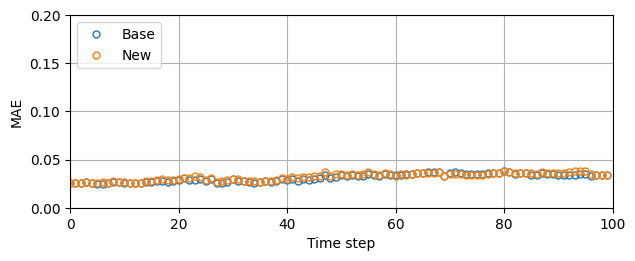

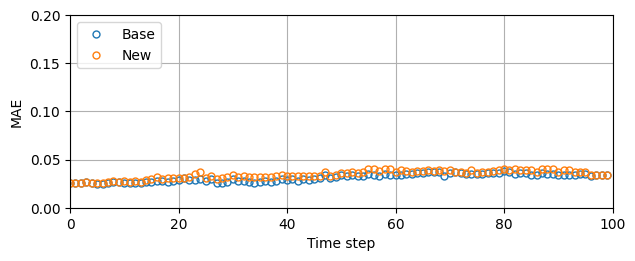

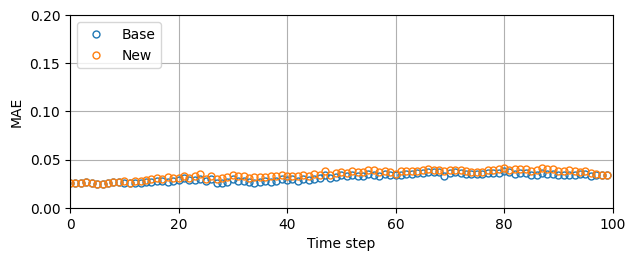

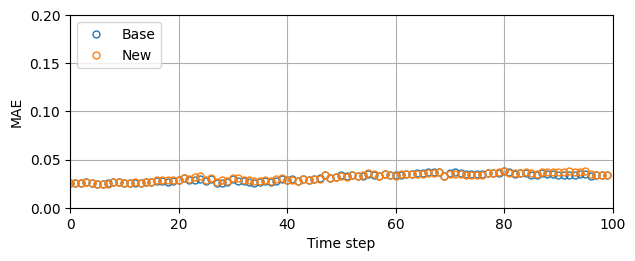

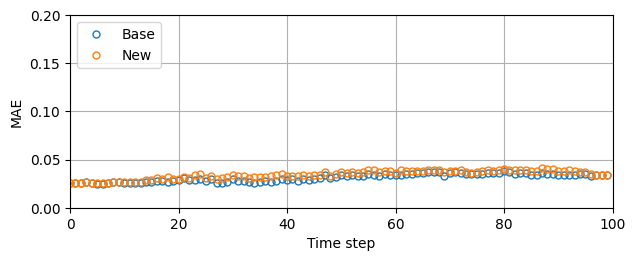

In [15]:
base = get_mae(true, predicted)
gradboost = get_mae(true, predicted_gradboost)
knn = get_mae(true, predicted_knn)
logreg = get_mae(true, predicted_logreg)
mlp = get_mae(true, predicted_mlp)
svc = get_mae(true, predicted_svc)

models = [
    ('#1. Pointwise motifs. Gradient boosting classifier.', gradboost, 'energy_pointwise_grad_mae.pdf'),
    ('#2. Pointwise motifs. KNN classifier.', knn, 'energy_pointwise_knn_mae.pdf'),
    ('#3. Pointwise motifs. Logistic regression classifier.', logreg, 'energy_pointwise_log_mae.pdf'),
    ('#4. Pointwise motifs. MLP classifier.', mlp, 'energy_pointwise_mlp_mae.pdf'),
    ('#5. Pointwise motifs. SVM classifier.', svc, 'energy_pointwise_svm_mae.pdf')
]

for label, model, file_name in models:
    plt.figure(figsize=[7, 2.5])
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0, top=0.2)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('MAE')
    plt.legend(loc='upper left')
    plt.grid()
    plt.savefig(path + file_name, bbox_inches='tight')
    plt.show()